# Project1: Implement an Image Classification

## Project 1 - Part 2: Train an Image Classifier From Scratch


### Step 1: Understand Your Problem 
#### What Do We Need and How to Achieve It? 
##### 1. You need correctly-labeled images of each animal.
##### 2. Also, you need to train a network to understand the input image.

In [1]:
#import libraries
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from tensorflow.keras import layers, models

from tensorflow.keras.regularizers import l2


from dataclasses import dataclass
import platform

# Text formatting
bold = "\033[1m"
end = "\033[0m"

block_plot=False

%matplotlib inline

### Set Seeds
Use this function to set random seeds for CPU and GPU operations in order to make training deterministic and to ensure reproducibility.

In [2]:
def set_seeds():
    # fix random seeds
    SEED_VALUE = 42

    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    tf.random.set_seed(SEED_VALUE)
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
    
#     physical_devices = tf.config.list_physical_devices("GPU")
#     try:
#         tf.config.experimental.set_memory_growth(physical_devices[0], True)
#     except:
#         # Invalid device or cannot modify virtual devices once initialized.
#         pass

    return

set_seeds()

In [3]:
# Creating a MirroredStrategy for distributed training.
# This strategy effectively replicates the model's layers on each GPU or other available devices,
# syncing their weights after each training step.
DISTRIBUTE_STRATEGY = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [4]:
# Printing the number of devices that are in sync with the MirroredStrategy.
# This indicates how many replicas of the model are being trained in parallel.
print('Number of devices: {}'.format(DISTRIBUTE_STRATEGY.num_replicas_in_sync))

Number of devices: 1


## Step 2: Dataset Exploration
### Step 2A: Get the Data 
#### Let’s use a dataset from kaggle. Check it out here.
#### Save the dataset to "./dataset"

In [5]:
# If required, update the root_dir path according to the dataset path.

root_dir = r"./dataset"

train_dir = os.path.join(root_dir, "Train")
valid_dir = os.path.join(root_dir, "Valid")

print(train_dir)

./dataset\Train


In [6]:
### Folder Structure 
def list_folders(startpath):
    for root, _, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root):<8}')


list_folders(root_dir)

dataset 
    .ipynb_checkpoints
    Test    
        .ipynb_checkpoints
    Train   
        cow     
        elephant
        horse   
            .ipynb_checkpoints
        spider  
    Valid   
        cow     
        elephant
        horse   
        spider  


In [7]:
# List the Classes
print(f"{bold}Training Classes:{end} ")
for i in os.listdir(train_dir):
    print(i)
    
print("------------")

print(f"{bold}Validation Classes:{end} ")
for j in os.listdir(valid_dir):
    print(j)

Training Classes: 
cow
elephant
horse
spider
------------
Validation Classes: 
cow
elephant
horse
spider


### Find the Number of Samples in Training and Validation Folders

In [8]:
num_train_files = 0
num_valid_files = 0

### YOUR CODE HERE
def count_files(directory):
    return sum(len(files) for _,_, files in os.walk(directory))

num_train_files = count_files(train_dir)
num_valid_files = count_files(valid_dir)
###

print(f"{bold}Number of Training samples: {end}{num_train_files}")
print(f"{bold}Number of Validation samples: {end}{num_valid_files}")

Number of Training samples: 3998
Number of Validation samples: 786


### Display Some Samples and the Size of the Image[4 Points]
### Display one sample for each class

##### Choose randomly one sample from each class folder in the Train directory.

#### 1. Load image using PIL.Image or matplotlib or opencv.
#### 2. Print size/shape of the image.
#### 3. Display image file using matplotlib.

Class: cow
Image: 6973409.jpg
Size: (293, 300)


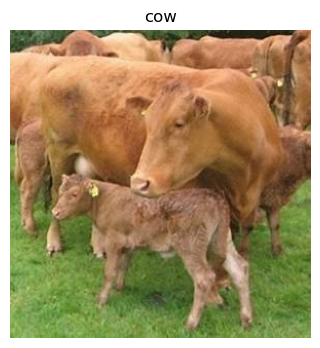

In [9]:
target = "cow"

# Load image and print its shape/size.

### YOUR CODE HERE
class_name = target

# Select one random image from each class
#for class_name in classes:
class_path = os.path.join(train_dir, class_name)
if os.path.isdir(class_path):  # Ensure it's a directory
    image_file = random.choice(os.listdir(class_path))  # Pick a random image
    image_path = os.path.join(class_path, image_file)
    
    # Load image
    img = Image.open(image_path)
    
    # Print image size
    print(f"Class: {class_name}")
    print(f"Image: {image_file}")
    print(f"Size: {img.size}")  # (width, height)
    
    # Display image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title(class_name)
    plt.show()
###

Class: elephant
Image: 2001132.jpg
Size: (426, 640)


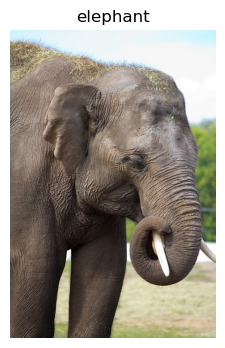

In [10]:
target = "elephant"

# Load image and print its shape/size.

### YOUR CODE HERE
class_name = target

# Select one random image from each class
class_path = os.path.join(train_dir, class_name)
if os.path.isdir(class_path):  # Ensure it's a directory
    image_file = random.choice(os.listdir(class_path))  # Pick a random image
    image_path = os.path.join(class_path, image_file)
    
    # Load image
    img = Image.open(image_path)
    
    # Print image size
    print(f"Class: {class_name}")
    print(f"Image: {image_file}")
    print(f"Size: {img.size}")  # (width, height)
    
    # Display image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title(class_name)
    plt.show()
###

Class: horse
Image: 1227046.jpg
Size: (300, 216)


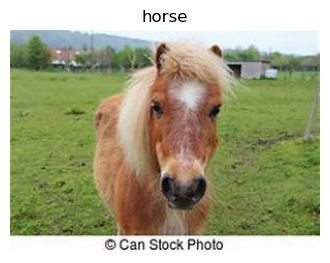

In [11]:
target = "horse"

# Load image and print its shape/size.

### YOUR CODE HERE
class_name = target

# Select one random image from each class
class_path = os.path.join(train_dir, class_name)
if os.path.isdir(class_path):  # Ensure it's a directory
    image_file = random.choice(os.listdir(class_path))  # Pick a random image
    image_path = os.path.join(class_path, image_file)
    
    # Load image
    img = Image.open(image_path)
    
    # Print image size
    print(f"Class: {class_name}")
    print(f"Image: {image_file}")
    print(f"Size: {img.size}")  # (width, height)
    
    # Display image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title(class_name)
    plt.show()
###

Class: spider
Image: 7956169.jpg
Size: (300, 241)


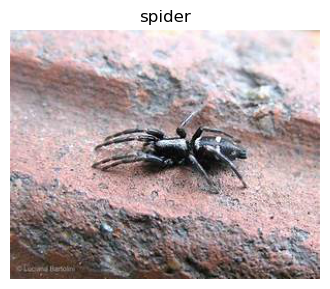

In [12]:
target = "spider"

# Load image and print its shape/size.

### YOUR CODE HERE
class_name = target

# Select one random image from each class
class_path = os.path.join(train_dir, class_name)
if os.path.isdir(class_path):  # Ensure it's a directory
    image_file = random.choice(os.listdir(class_path))  # Pick a random image
    image_path = os.path.join(class_path, image_file)
    
    # Load image
    img = Image.open(image_path)
    
    # Print image size
    print(f"Class: {class_name}")
    print(f"Image: {image_file}")
    print(f"Size: {img.size}")  # (width, height)
    
    # Display image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title(class_name)
    plt.show()
###

## Step 3. Data Preparation [5 Points]
#### * create a data_augmentation_preprocess() function that returns a Sequential model made up of different augmentation layers.
#### * The augmentation pipeline returned from this function will be applied using the Dataset.map() method as part of data loading.
#### * Using this approach, the dataset will yield batches of augmented images.

#### * Starting from the Training from Scratch notebook, you can use:

#####     Option 1: Make the preprocessing layers part of your model.
#####     Option 2: Apply the preprocessing layers to your dataset.

In [13]:
def data_augmentation_preprocess():
    # Combine multiple augmentations in a single processing pipeline.
    """Returns a Sequential model with data augmentation layers."""
    data_augmentation_pipeline = keras.Sequential([

     #   layers.RandomFlip("horizontal"),
     #   layers.RandomRotation(0.1),
     #   layers.RandomZoom(0.1),
     #   layers.RandomContrast(0.1)

        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),
        layers.GaussianNoise(0.05),
        layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
        
   #     layers.RandomRotation(0.2, fill_mode='nearest'),   # Increase rotation range
   #     layers.RandomFlip("horizontal"),      # Flip horizontally & vertically
   #     layers.RandomZoom(height_factor=(-0.2, 0.2),                # Increase zoom range
   #                       width_factor=(-0.2, 0.2),
   #                       fill_mode='nearest', seed=42),
  #      layers.RandomContrast(0.2),                                # Increase contrast range
  #      layers.RandomTranslation(height_factor=0.2,                # Random shift vertically
  #                               width_factor=0.2, 
  #                               fill_mode='nearest'),
#        layers.RandomBrightness(factor=0.3, seed=42),              # Random brightness adjustment
                                        # Add random noise
#        layers.RandomCrop(height=100, width=100),                  # Random cropping
        
    ], name="data_augmentation")

    return data_augmentation_pipeline

# Option 1: Add preprocessing layers as part of the model
#data_augmentation = data_augmentation_preprocess()

# Option 2: Apply preprocessing to the dataset using Dataset.map()
#def preprocess_dataset(image, label):
#    image = tf.image.convert_image_dtype(image, tf.float32)  # Ensure proper dtype
#    image = data_augmentation(image)
#    return image, label

### Question [2 points]
#### Spot and correct 2 mistakes present in the get_data function.

In [16]:
def get_data(*, data_root, target_size=(224, 224), batch_size=32, data_augmentation=False):
    ### YOUR CODE HERE
  
    train_path = os.path.join(data_root, "Train")
    train_dataset = image_dataset_from_directory(    

        train_path, 
        label_mode='categorical',
        color_mode='rgb', 
        batch_size=batch_size, 
        image_size=target_size, 
        shuffle=True,
    )

    valid_path = os.path.join(data_root, "Valid")    
    valid_dataset = image_dataset_from_directory(
        valid_path, 
        label_mode='categorical',
        color_mode='rgb', 
        batch_size=batch_size, 
        image_size=target_size, 
        shuffle=False, 
    )
    
    if data_augmentation: 
        data_augmentation_pipeline = data_augmentation_preprocess()
        train_dataset = train_dataset.map(lambda x, y: (data_augmentation_pipeline(x), y))
     #   valid_dataset = valid_dataset.map(lambda x, y: (data_augmentation_pipeline(x), y))  #mistakenly assign the data augmentation to the valid dataset

    # Resize if needed
#    def preprocess_image(image, label):
#        image = tf.image.resize(image, [224, 224])
#        return image, label

#    train_dataset = train_dataset.map(preprocess_image)
#    valid_dataset = valid_dataset.map(preprocess_image)
        
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)    
#    valid_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)    #mistakenly assign train dataset to valid dataset
    valid_dataset = valid_dataset.prefetch(tf.data.AUTOTUNE)
  ###
    return train_dataset, valid_dataset

## Step 4: Train a Simple Model
### 4.1. Configurations
#### Change the configurations as given below:

##### 1.Set up the training pipeline with a batch size of 32.
##### 2.Run the experiment then for 30 epochs.
##### 3.Change the learning rate to 0.01.
##### 4.Use a data shape of (224, 224, 3) for training.

In [17]:
# 4.1.1. Training Configuration
@dataclass
class TrainingConfig:
    # Defining the batch size for model training.
    # The batch size is set to be some integer times the  number of devices in synchronization as per the distributed strategy.
    # This means that the overall batch of data is divided equally across all the devices used in the distributed training.
    # By scaling the batch size with the number of replicas (devices), each device processes a batch of size, in this case, 4.
   
    # This approach helps in efficient utilization of the computational power of all the devices involved in training.
    BATCH_SIZE: int = 32 * DISTRIBUTE_STRATEGY.num_replicas_in_sync

    EPOCHS: int = 100

    LEARNING_RATE: float = 0.0005

    # For tensorboard logging and saving checkpoints
    root_log_dir = os.path.join("Logs_Checkpoints", "Model_logs")
    root_checkpoint_dir = os.path.join("Logs_Checkpoints", "Model_checkpoints")

    # Current log and checkpoint directory.
    log_dir = "version_0"
    checkpoint_initial = "version_0"

    # Use multiprocessing during training.
    use_multiprocessing: bool = True if platform.system() == "Linux" else False
        
    # Number of workers to use for training.
    num_workers: int = 4

In [18]:
#4.1.2. Dataset Configuration¶
@dataclass
class DatasetConfig:
 #   DATA_ROOT: str = r"/kaggle/input/opencv-tf-project-1-image-classification-round-3/dataset"
    DATA_ROOT: str = r"./dataset"
    DATA_SHAPE: tuple = (224, 224, 3)
    NUM_CLASSES: int = 4

## 4.2. Callbacks

In [19]:
def get_callbacks(
    training_config=TrainingConfig(),
    monitor="val_loss",
    mode="min",
    save_weights_only=False,
    save_best_only=True,
):

    # Initialize tensorboard callback for logging.
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=training_config.log_dir,
        histogram_freq=20,
        write_graph=True,
        update_freq="epoch",
        write_images=True,
    )

    
    checkpoint_filepath = training_config.checkpoint_path
    
    # Update file path if saving best model weights.
    if save_weights_only:
        checkpoint_filepath = os.path.join(checkpoint_filepath, "model.ckpt")
    else:
        checkpoint_filepath = os.path.join(checkpoint_filepath, "model.keras")

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=save_weights_only,
        monitor=monitor,
        mode=mode,
        save_best_only=save_best_only,
        verbose=0,
    )
    
    return [tensorboard_callback, model_checkpoint_callback]

## 4.3. Logging Setup

In [21]:
def setup_log_directory(training_config=TrainingConfig()):
    '''Tensorboard Log, Model checkpoint directory Setup and Early stopping'''
    
    get_number = lambda path: path.replace(".keras", "").replace("version_", "")
    
    if os.path.isdir(training_config.root_log_dir):
        # Get all folders numbers in the root_log_dir
        folder_numbers = [int(get_number(folder)) for folder in os.listdir(training_config.root_log_dir)]
        
        # Find the latest version number present in the log_dir
        last_version_number = max(folder_numbers)

        # New version name
        version_name = f"version_{last_version_number + 1}"

    else:
        version_name = training_config.log_dir


    # Update the training config default directory 
    training_config.log_dir        = os.path.join(training_config.root_log_dir,        version_name)
    training_config.checkpoint_path = os.path.join(training_config.root_checkpoint_dir, version_name)

    # Create new directory for saving new experiment version
    os.makedirs(training_config.log_dir, exist_ok=True)
    os.makedirs(training_config.root_checkpoint_dir, exist_ok=True)

    print(f"Logging at: {training_config.log_dir}")
    print(f"Model Checkpoint at: {training_config.checkpoint_path}")
    
    return training_config, version_name

## 4.4. Plot Loss and Accuracy

In [22]:
def plot_history(
    train_loss=None,
    val_loss=None,
    train_metric=None,
    val_metric=None,
    colors=["blue", "green"],
    loss_legend_loc="upper center",
    acc_legend_loc="upper left",
    fig_size=(15, 10),
):

    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    fig.set_facecolor("white")

    # Loss Plots
    plt.subplot(2, 1, 1)

    train_loss_range = range(len(train_loss))
    plt.plot(
        train_loss_range,
        train_loss,
        color=f"tab:{colors[0]}",
        label=f"Train Loss",
    )

    valid_loss_range = range(len(val_loss))
    plt.plot(
        valid_loss_range,
        val_loss,
        color=f"tab:{colors[1]}",
        label=f"Valid Loss",
    )

    plt.ylabel("Loss")
    plt.legend(loc=loss_legend_loc)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True)
    plt.title("Training and Validation Loss")

    # Accuracy Plots
    plt.subplot(2, 1, 2)

    train_metric_range = range(len(train_metric))
    plt.plot(
        train_metric_range,
        train_metric,
        color=f"tab:{colors[0]}",
        label=f"Train Accuracy",
    )

    val_metric_range = range(len(val_metric))
    plt.plot(
        val_metric_range,
        val_metric,
        color=f"tab:{colors[1]}",
        label=f"Valid Accuracy",
    )

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend(loc=acc_legend_loc)
    plt.grid(True)
    plt.title("Training and Validation Accuracy")

    plt.show(block=block_plot)

    return

## 4.5. Define Model

In [23]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
    Flatten,
    Dense,
    GlobalAveragePooling2D,
    Rescaling,
    Dropout,
)


def get_model(num_classes=4, input_shape=(224, 224, 3), name="Dummy_Model"):
    ### YOUR CODE HERE  
    
    inputs = Input(shape=input_shape)
    
    rescaled = Rescaling(1./255)(inputs)
    
    x = Conv2D(8, 3, activation="relu", kernel_regularizer=l2(0.001))(rescaled)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(16, 3, activation="relu", kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    #add dropout layer
    #x = Dropout(0.25)(x)

    x = Conv2D(32, 3, activation="relu", kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    #add dropout layer
#    x = Dropout(0.25)(x)

#    x = Conv2D(64, 3, activation="relu", kernel_regularizer=l2(0.001))(x)
#    x = BatchNormalization()(x)
#    x = MaxPooling2D(pool_size=(2, 2))(x)

    flatten = Flatten()(x)
    x = layers.Dense(32, activation='relu')(flatten)
    x = layers.Dropout(0.35)(x)
    output = Dense(num_classes, activation="softmax")(x)

    ### 
    # return your model
    return Model(inputs=inputs, outputs=output, name=name)

## 4.6. Training Pipeline

In [24]:
def train_model(
    dataset_config=DatasetConfig(),
    training_config=TrainingConfig(),
    data_augmentation=True,
    print_summary=True,
):

    # Get training and validation datasets.
    train_dataset, valid_dataset = get_data(
        data_root=dataset_config.DATA_ROOT,
        target_size=dataset_config.DATA_SHAPE[:2],
        batch_size=training_config.BATCH_SIZE,
        data_augmentation=data_augmentation,
    )
    
    for images, labels in valid_dataset:
        print("X Shape:", images.shape, "Y Shape:", labels.shape)
        break

    # Start a context manager using the distributed strategy previously defined.
    # This scope ensures that the operations defined within it are distributed across the available devices as per the strategy.
    with DISTRIBUTE_STRATEGY.scope():
        # Get the model by calling the 'get_model' function.
        model = get_model(num_classes=dataset_config.NUM_CLASSES, input_shape=dataset_config.DATA_SHAPE)

        # Compile the model. This step configures the model for training.
        # 'loss' is set to 'categorical_crossentropy', which is a common choice for classification tasks.
        # 'optimizer' is an Adam optimizer with a specific learning rate from the training configuration.
        # 'metrics' is a list of metrics to be evaluated by the model during training and testing, here it's set to track 'accuracy'.
        model.compile(
            loss="categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(learning_rate=training_config.LEARNING_RATE),
            metrics=["accuracy"],
        )


    # Print model summary
    if print_summary:
        model.summary()

    # Get training callbacks
    callbacks = get_callbacks(training_config)

    # Train model
    training_results = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=training_config.EPOCHS,
        callbacks=callbacks,
#        workers=training_config.num_workers,
#        use_multiprocessing=training_config.use_multiprocessing
    )

    print("training_results keys:", training_results.history.keys())

    return model, training_results

## 4.7. Training¶

In [25]:
training_config = TrainingConfig()

# Tensorboard Log and model checkpoint Setup.
training_config, current_version_name = setup_log_directory(training_config)

Logging at: Logs_Checkpoints\Model_logs\version_16
Model Checkpoint at: Logs_Checkpoints\Model_checkpoints\version_16


In [26]:
# Start training

trained_model, training_results = train_model(
    dataset_config=DatasetConfig(),
    training_config=training_config,
    data_augmentation=True,
)

Found 3998 files belonging to 4 classes.
Found 786 files belonging to 4 classes.
X Shape: (32, 224, 224, 3) Y Shape: (32, 4)


Model: "Dummy_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         692,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 698,644 (2.67 MB)

 Trainable params: 698,532 (2.66 MB)

 Non-trainable params: 112 (448.00 B)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.2842 - loss: 1.8014 - val_accuracy: 0.2608 - val_loss: 5.0120
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.3107 - loss: 1.3864 - val_accuracy: 0.2379 - val_loss: 6.7671
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.3297 - loss: 1.3622 - val_accuracy: 0.2964 - val_loss: 2.6034
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.3143 - loss: 1.4093 - val_accuracy: 0.3308 - val_loss: 1.5170
Epoch 5/100
 11/125 ━━━━━━━━━━━━━━━━━━━━ 1:59 1s/step - accuracy: 0.3037 - loss: 1.4706

KeyboardInterrupt: 

## 4.8. Loss and Accuracy Plot

In [76]:
# Save the trained model
from tensorflow.keras.models import save_model
MODEL_PATH = "cnn_model.h5"

save_model(trained_model, MODEL_PATH)  # Saves as an HDF5 file
print(f"Model saved to {MODEL_PATH}")

Model saved to cnn_model.h5


In [77]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(MODEL_PATH)

In [92]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = './dataset/Test/1171318.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values (if required)

In [93]:
# Make prediction
predictions = loaded_model.predict(img_array)

print(predictions)

# Map the prediction to the class label
class_labels = ['cow', 'elephant', 'horse', 'spider']
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")
print(f"Confidence: {predictions[0][predicted_class_index]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.01366523 0.83117163 0.00575861 0.1494046 ]]
Predicted class: elephant
Confidence: 0.83


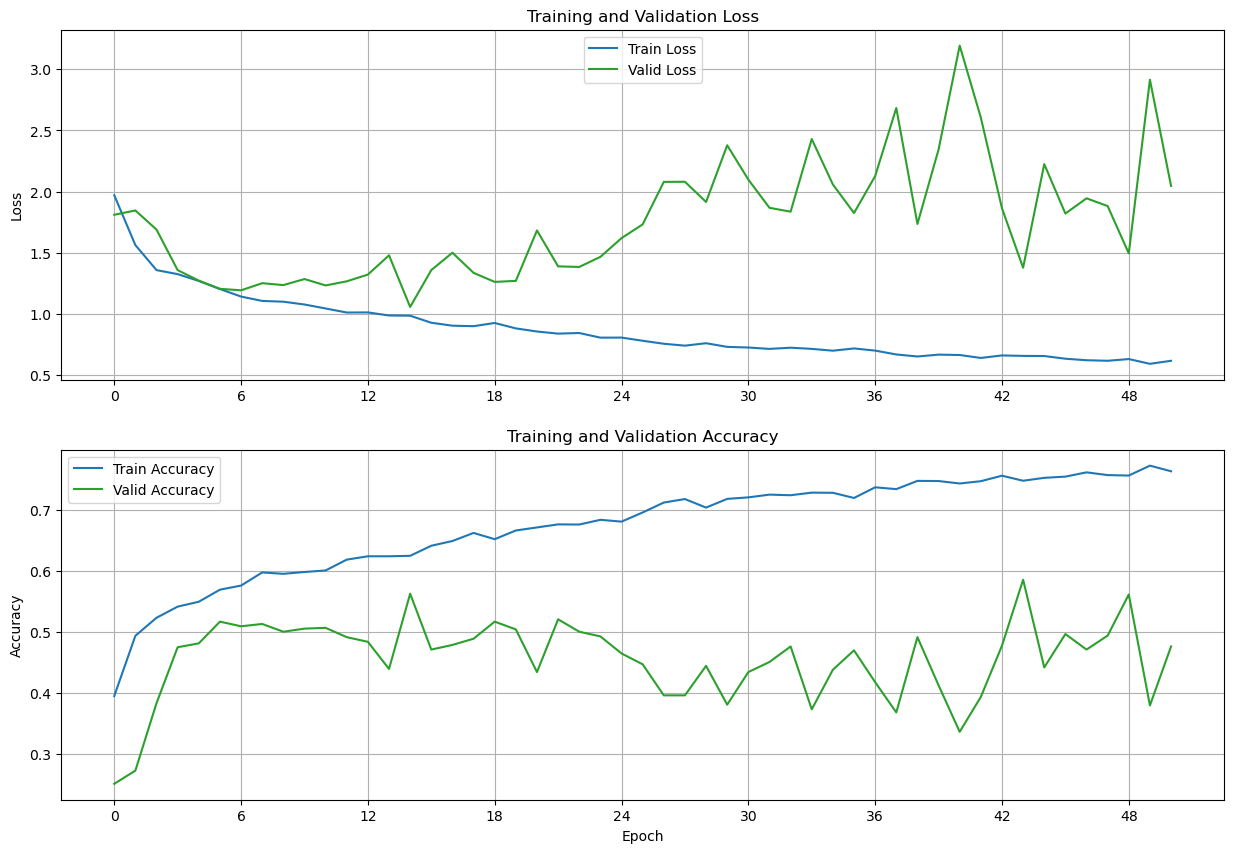

In [48]:
loss = training_results.history["loss"]
accuracy = training_results.history["accuracy"]

val_loss = training_results.history["val_loss"]
val_accuracy = training_results.history["val_accuracy"]

plot_history(
    train_loss=loss,
    train_metric=accuracy,
    val_loss=val_loss,
    val_metric=val_accuracy,
    loss_legend_loc="upper center",
    acc_legend_loc="upper left",
)

# Step 5: Sample Prediction
## 5.1. Reload the Model

In [49]:
def recreate_model(path, load_weights=False, config=DatasetConfig(), **kwargs):
    """
    For reloading trained model
    Args:
        path: current_version checkpoint path
        load_weights: Whether the files saved at path contains model weights
                      or the Entire model configuration
        **kwargs: use to pass additional keyword arguments to the load_model method
    Returns:
        Reinitialized Trained Model
    """

    if load_weights:
        
        # Create model architecture
        model = get_model(num_classes=config.NUM_CLASSES, input_shape=config.DATA_SHAPE)

        # Load trained model best weights.
        path = os.path.join(path, "model.ckpt")
        model.load_weights(path).expect_partial()
    else:
        path = os.path.join(path, "model.keras")
        model = tf.keras.models.load_model(path, **kwargs)

    model.summary()
    return model

In [50]:
# Loading trained model
load_version = current_version_name
checkpoint_path = os.path.join(training_config.root_checkpoint_dir, load_version) 

trained_model = recreate_model(checkpoint_path)

Model: "Dummy_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 222, 222, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 52, 52, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 185,150 (723.25 KB)

 Trainable params: 61,636 (240.77 KB)

 Non-trainable params: 240 (960.00 B)

 Optimizer params: 123,274 (481.54 KB)

## 5.2. Running Inference

In [104]:
def get_sample_predictions(*, model, dataset, total=15):

    imgs = []
    ground_truths = []
    probs = []
    predictions = []

    idx_to_cls = {0: "cow", 1: "elephant", 2: "horse", 3: "spider"}

    print("Generating Predictions...")
    for data, target in dataset:
        model_predictions = model.predict_on_batch(data)
        cls_predicted = np.argmax(model_predictions, axis=-1)
        cls_probs = np.max(model_predictions, axis=-1)
    
        imgs.extend(data.numpy() / 255.)
        ground_truths.extend(target.numpy())
        predictions.extend(cls_predicted)
        probs.extend(cls_probs)
        
        # Displaying only 15 images 
        if data.shape[0] >= total: 
            break

    plt.style.use("default")
    plt.rcParams["figure.figsize"] = (18, 9)
    fig = plt.figure()
    fig.set_facecolor("white")

    for idx in range(total):

        plt.subplot(3, 5, idx + 1)
        img = imgs[idx]
        plt.imshow(img)

        plt.title(f"P:{idx_to_cls[predictions[idx]]}({probs[idx]:.2}), T:{idx_to_cls[ground_truths[idx]]}")
        plt.axis("off")

    fig.savefig("sample_predictions.png")
    plt.show(block=block_plot)
    
    del imgs, ground_truths, probs, predictions
    return

Found 786 files belonging to 4 classes.
Generating Predictions...


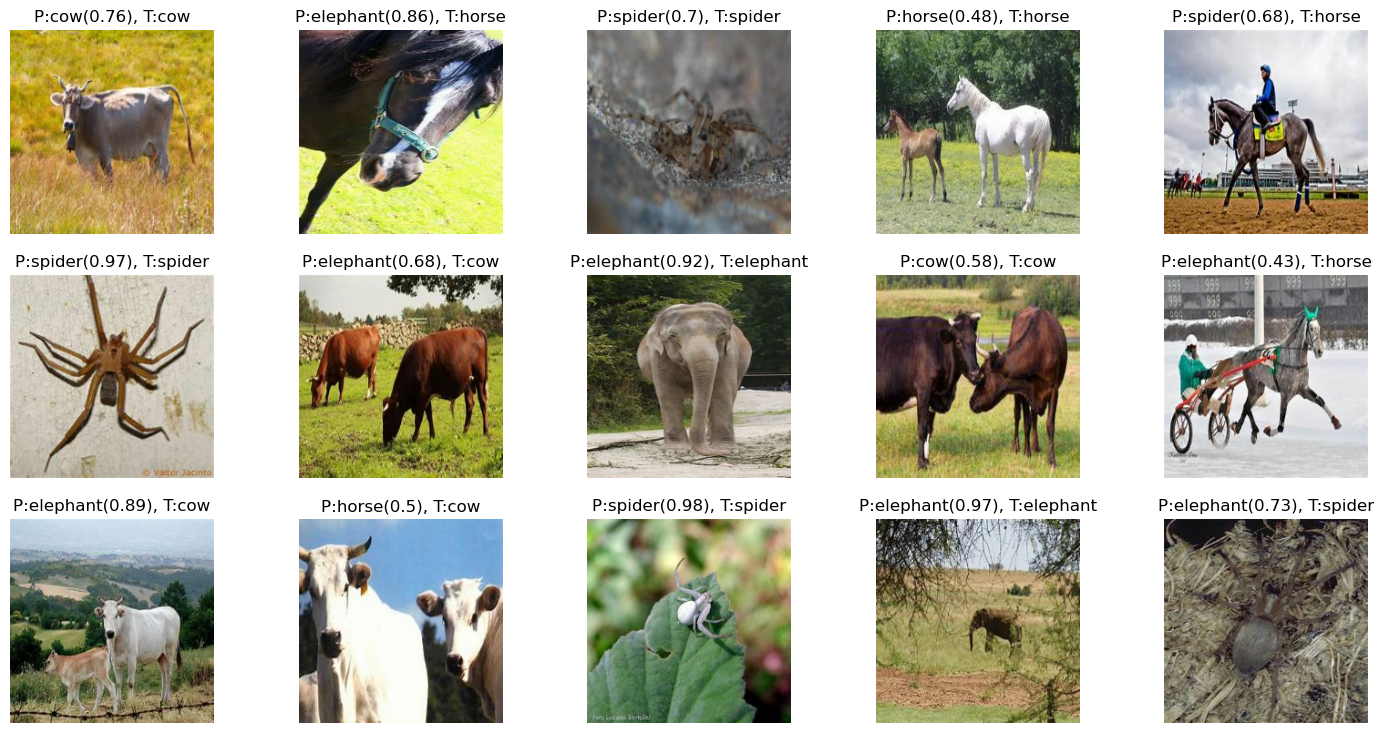

In [52]:
data_config = DatasetConfig()
training_config = TrainingConfig()

valid_path = os.path.join(data_config.DATA_ROOT, "Valid")

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_path, 
    label_mode='int',
    color_mode='rgb', 
    batch_size=training_config.BATCH_SIZE, 
    image_size=data_config.DATA_SHAPE[:2], 
    shuffle=True, # shuffling to show images from all classes
)

get_sample_predictions(model=trained_model, dataset=valid_dataset)

# Step 6. Display Confusion Matrix [5 Points]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


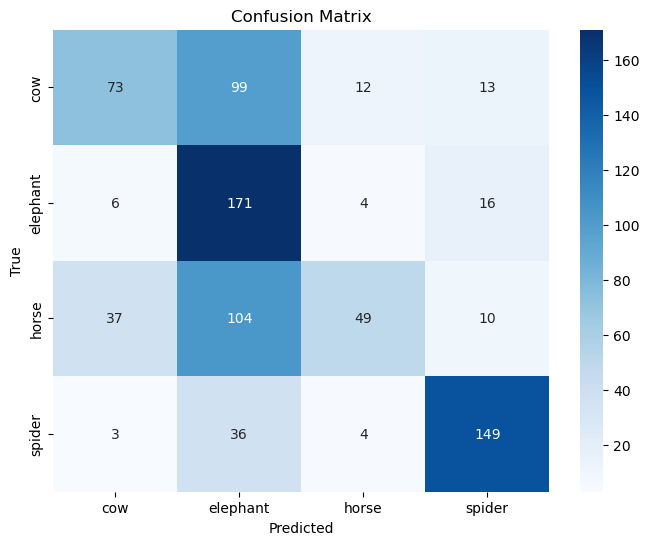

In [62]:
### YOUR CODE HERE

from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, dataset, class_names):
    """Displays the confusion matrix for the given model and dataset."""
    
    true_labels = []
    pred_labels = []

    # Iterate through dataset and collect true labels and predictions
    for images, labels in dataset:
        preds = model.predict(images)
        pred_labels.extend(np.argmax(preds, axis=1))  # Convert probabilities to class indices

        # Check if labels are one-hot encoded or integers
        if len(labels.shape) == 1:  # Labels are already integer class indices
            true_labels.extend(labels.numpy())
        else:  # Labels are one-hot encoded, convert them
            true_labels.extend(np.argmax(labels.numpy(), axis=1))

        
     #   true_labels.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to class indices

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

class_names = ['cow', 'elephant', 'horse', 'spider']  # Replace with actual class names
plot_confusion_matrix(trained_model, valid_dataset, class_names)
            
###

In [66]:
#option 1: 
import pandas as pd

#test_csv_path = r"/kaggle/input/opencv-tf-project-1-image-classification-round-3/test.csv"
#test_image_dir = r"/kaggle/input/opencv-tf-project-1-image-classification-round-3/dataset/Test"
test_csv_path = r"./test.csv"
test_image_dir = r"./dataset/Test"
IMG_SIZE = (224, 224)

test_df = pd.read_csv(test_csv_path)
test_images = []
image_ids = []

test_ids = test_df['ID'].tolist()
CLASS_NAMES=['cow', 'elephant', 'horse', 'spider']

for img_id in test_ids:
    img_path = os.path.join(test_image_dir, f"{img_id}")

    if not os.path.exists(img_path):
        warnings.warn(f"Image not found: {img_path}")
        continue #Skip this image
    
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)/255.0     # rescale to [0, 1]

    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    test_images.append(img_array)
    image_ids.append(img_id)

test_images = np.vstack(test_images)  # Stack all images into a single NumPy array

# Predict on test images
predictions = trained_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Get class index
predicted_class_names = [CLASS_NAMES[idx] for idx in predicted_classes]  # Convert to class names
accuracy_scores = np.max(predictions, axis=1)  # Get highest probability as accuracy

# Create submission file
submission_df = pd.DataFrame({
    'ID': image_ids,
    'Class': predicted_class_names,
    'Accuracy': accuracy_scores
})

# Save results
submission_df.to_csv("sample_submission2.csv", index=False)
print("Test results saved to 'sample_submission.csv' successfully!")

52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step
Test results saved to 'sample_submission.csv' successfully!


In [67]:
#option 2: 
import pandas as pd

test_csv_path = r"./test.csv"
test_image_dir = r"./dataset/Test"
IMG_SIZE = (224, 224)

test_df = pd.read_csv(test_csv_path)
test_images = []     #contains the images for testing
image_ids = []

test_ids = test_df['ID'].tolist()

for img_id in test_ids:
    img_path = os.path.join(test_image_dir, f"{img_id}")

    if not os.path.exists(img_path):
        warnings.warn(f"Image not found: {img_path}")
        continue #Skip this image
    
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)/255.0     # rescale to [0, 1]

    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    test_images.append(img_array)
    image_ids.append(img_id)


#ground_truths = []
probs = []
predictions = []

idx_to_cls = {0: "cow", 1: "elephant", 2: "horse", 3: "spider"}

print("Generating Predictions...")
for data in test_images:
    model_predictions = trained_model.predict_on_batch(data)
    cls_predicted = np.argmax(model_predictions, axis=-1)
    cls_probs = np.max(model_predictions, axis=-1)

#    ground_truths.extend(target.numpy())
    predictions.extend(cls_predicted)
    probs.extend(cls_probs)
        
# Save results to CSV
submission_file="sample_submission_f.csv"

submission_df = pd.DataFrame({'ID': image_ids, 'Class': predictions, 'Accuracy': probs}) #'TrueClass': ground_truths})
submission_df.to_csv(submission_file, index=False)
print(f"Test results saved to '{submission_file}' successfully!")

Generating Predictions...
Test results saved to 'sample_submission_f.csv' successfully!


In [60]:
#option 3: 
import pandas as pd

def infer_test_images(model, test_csv, test_dir, class_names, submission_file="sample_submission.csv"):
    """
    Infers the class of test images and saves results in a submission file.

    Parameters:
        model: Trained CNN model.
        test_csv: Path to CSV file containing test image names.
        test_dir: Directory containing test images.
        class_names: List of class names corresponding to model output indices.
        submission_file: Output file to save results.
    """
    # Load test image names
    test_df = pd.read_csv(test_csv)
    image_names = test_df['ID'].tolist()
    
    test_images = []
    image_ids = []

    # Preprocess test images
    for img_name in image_names:
        img_path = os.path.join(test_dir, f"{img_name}")
        if os.path.exists(img_path):
            img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
            img_array = keras.preprocessing.image.img_to_array(img) / 255.0
            test_images.append(img_array)
            image_ids.append(img_name)

    test_images = np.array(test_images)

    # Predict classes
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    class_labels = [class_names[i] for i in predicted_classes]

    # Save results to CSV
    submission_df = pd.DataFrame({'ID': image_ids, 'Class': class_labels})
    submission_df.to_csv(submission_file, index=False)
    print(f"Test results saved to '{submission_file}' successfully!")

# Example usage
# infer_test_images(model, "test.csv", "path/to/test/images", class_names=['cow', 'elephant', 'horse', 'spider'])



In [61]:
infer_test_images(trained_model, "test.csv", "./dataset/Test", class_names=['cow', 'elephant', 'horse', 'spider'])

52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step
Test results saved to 'sample_submission.csv' successfully!


In [71]:
#option 4: 
import pandas as pd

def infer_test_images(model, test_dir, test_csv, output_csv):
    """
    Predicts the class of test images and saves the results.

    Args:
    - model: Trained CNN model.
    - test_dir: Path to the test images folder.
    - test_csv: Path to the CSV file containing test image names.
    - output_csv: Path to save the predictions.
    """

    # Define class labels
    CLASS_NAMES = ['cow', 'elephant', 'horse', 'spider']
    IMG_SIZE = (224, 224)  # Adjust based on training image size

    # Load test image names
    test_df = pd.read_csv(test_csv)
    test_images = []
    image_ids = []

    # Preprocess test images
    for img_name in test_df['ID']:
        img_path = os.path.join(test_dir, img_name)

        if not os.path.exists(img_path):
            print(f"Warning: {img_name} not found in {test_dir}")
            continue

        # Load and preprocess image
        img = keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
        img_array = keras.preprocessing.image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        test_images.append(img_array)
        image_ids.append(img_name)

    if not test_images:
        print("No valid test images found!")
        return

    # Convert list to numpy array
    test_images = np.vstack(test_images)

    # Make predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)  # Get class index
    predicted_class_names = [CLASS_NAMES[idx] for idx in predicted_classes]  # Convert index to class names

    accuracy_scores = np.max(predictions, axis=1)  # Max probability as confidence score

    # Save predictions
    submission_df = pd.DataFrame({
        'ID': image_ids,
        'Class': predicted_class_names,
        'Accuracy': accuracy_scores
    })

    submission_df.to_csv(output_csv, index=False)
    print(f"Predictions saved to {output_csv} successfully!")

In [72]:
test_csv_path = r"./test.csv"
test_image_dir = r"./dataset/Test"
OUTPUT_CSV = "sample_submission_v4.csv"

# Run inference
infer_test_images(trained_model, test_image_dir, test_csv_path, OUTPUT_CSV)

52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step
Predictions saved to sample_submission_v4.csv successfully!
